In [1]:
# %pip install xarray matplotlib numpy scipy

In [2]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
from scipy.fft import fft, fftfreq

# Frequency Analysis on Time Series Data

In these exercises we will be learning how to do frequency analysis to identify patterns and variations that occur at different frequencies in time series data. 

Some examples of where it's helpful in neuroscience are identifying repetitive patterns in ((M)EEG Brain Waves, LFP Analysis, Resting Potentials, Brain Region Connectivity Studies).

We will begin by first creating our own periodic time series signal before moving on to frequency analysis. Then, we will get a chance to work with a real data!

For these exercises, we will be using Pandas dataframes and matplotlib 

**Libraries Used:**

- **xarray (xr):**
  - `xr.load_dataset(filename_or_obj=filepath)`: Loads a dataset from the specified file path using the xarray library. 
  - `to_dataframe()`: Converts the LFP and feedback data loaded from xarray into Pandas DataFrames. 

- **Pandas**
  - df.reset_index(): resets the index of the DataFrame, turning the current index into a new column and creating a default integer index

## Load the Dataset

In [3]:
dset = xr.load_dataset('steinmetz_2017-12-06_Lederberg.nc')
lfp = dset['lfp'].to_dataframe().reset_index()

## Create Sine Wave

Sine waves are building blocks of complex waveforms. Any signal (periodic or aperiodic) can be broken into a sum of sine waves of different frequencies and amplitudes. This will come handy when we are trying to identify patterns in a time series data!

A sine wave is a smooth, periodic oscillation that is defined by the mathematical function sine. It is a fundamental waveform in mathematics and physics. A sine wave is characterized by Amplitude (A), Frequency (f), and Phase ($\phi$). Sine wave has a very elegant mathematical expression

$$y(t) = A\,sin(2\pi ft + \phi)$$

where, y(t) is value of wave at a time t </br>
A is amplitude of the wave (which is maximum height of the wave) </br>
f is frequency or number of oscillations per second </br>
t is time in second </br>
$\phi$ represents position in time to a reference point (a shift in phase moves the wave to the left or right on x-axis)  </br>

We will make use of numpy linspace, pi, sin to create a sine wave

**Exercise** create 10 values between 1 and 10 

In [7]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Create 4 values between 1 and 5

In [11]:
np.linspace(1, 4, 5)

array([1.  , 1.75, 2.5 , 3.25, 4.  ])

Great! Now let's assume that we have a signal measured 100 times between 0 and 1 second

Create a numpy array `t` such that it has 100 points between 0 and 1

In [14]:
t = np.linspace(0, 1, 100)

Numpy also has a way to access value of `pi` using np.pi

Display value of pi using numpy

In [15]:
np.pi

3.141592653589793

**Example** What's the sine of 0 degree

In [16]:
np.sin(0)

0.0

When the angle is 90 degree, the sine value is 1. Can you test that? 

In [25]:
np.sin(90)

0.8939966636005579

It's not! That's because numpy sin takes values in radians. It's enough for the exercises to remember that you can convert 90 degrees to radians using np.radian(90). 

Can you use this to check if sine of 90 degree is 1?

In [27]:
np.sin(np.radians(90))

1.0

What about 270 degree?

In [30]:
np.sin(np.radians(270))

-1.0

**Example** Create a sine wave of amplitude=1 unit, frequency=1 Hz, phi=0 between 0 and 1 second 

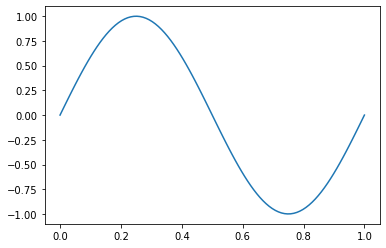

In [37]:
A = 1 # unit
f = 1 # Hz
phi = np.radians(0) # radians
t = np.linspace(0, 1, 100)
y = A*np.sin(2.0*np.pi*f*t + phi)
plt.plot(t, y)

Create a sine wave of amplitude=2 unit, frequency=1 Hz, phi=0 between 0 and 1 second

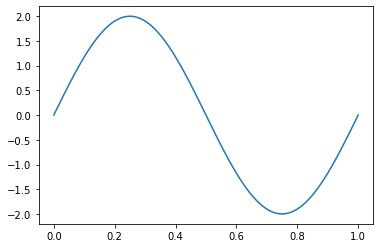

In [39]:
A = 2 # unit
f = 1 # Hz
phi = np.radians(0)
t = np.linspace(0, 1, 100)
y = A*np.sin(2.0*np.pi*f*t + phi)
plt.plot(t, y)

Increasing amplitude increases the height of the signal

Create a sine wave of amplitude=1 unit, frequency=0.5 Hz, phi=0 between 0 and 1 second

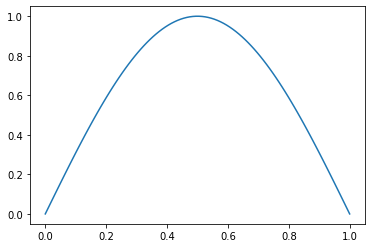

In [42]:
A = 1 # unit
f = 0.5 # Hz
phi = np.radians(0)
t = np.linspace(0, 1, 100)
y = A*np.sin(2.0*np.pi*f*t + phi)
plt.plot(t, y)

We see only half the original wave!

Create a sine wave of amplitude=1 unit, frequency=2 Hz, phi=0 between 0 and 1 second

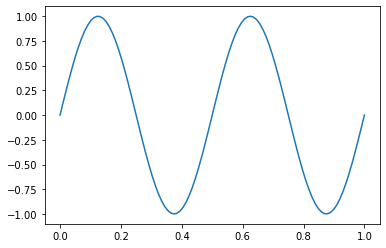

In [43]:
A = 1 # unit
f = 2 # Hz
phi = np.radians(0)
t = np.linspace(0, 1, 100)
y = A*np.sin(2.0*np.pi*f*t + phi)
plt.plot(t, y)

We see two waves in a second! To summarize, changing amplitude changes the height of the signal and changing frequency changes how many waves we see within the same time interval!

**Example** Create two sine waves  

y1 with amplitude=1 unit, frequency=1 Hz, phi=0 between 0 and 1 second </br>
y2 with amplitude=1 unit, frequency=1 Hz, phi=180 between 0 and 1 second

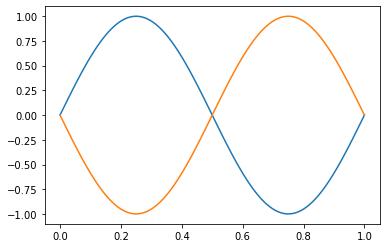

In [45]:
t = np.linspace(0, 1, 100)
phi1 = np.radians(0)
phi2 = np.radians(180)
y1 = 1.0*np.sin(2*np.pi*1.0*t + phi1)
y2 = 1.0*np.sin(2*np.pi*1.0*t + phi2)
plt.plot(t,y1)
plt.plot(t,y2)

Create two sine waves  

y1 with amplitude=1 unit, frequency=1 Hz, phi=0 between 0 and 1 second </br>
y2 with amplitude=1 unit, frequency=1 Hz, phi=90 between 0 and 1 second

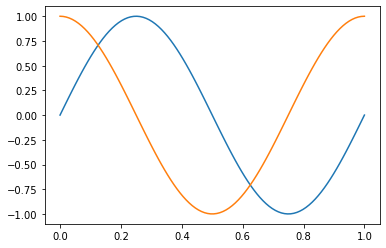

In [46]:
t = np.linspace(0, 1, 100)
phi1 = np.radians(0)
phi2 = np.radians(90)
y1 = 1.0*np.sin(2*np.pi*1.0*t + phi1)
y2 = 1.0*np.sin(2*np.pi*1.0*t + phi2)
plt.plot(t,y1)
plt.plot(t,y2)

Create and plot following sine waves  

y1 with amplitude=1 unit, frequency=1 Hz, phi=0 between 0 and 1 second </br>
y2 with amplitude=1 unit, frequency=1 Hz, phi=90 between 0 and 1 second </br>
y3 with amplitude=1 unit, frequency=1 Hz, phi=180 between 0 and 1 second </br>
y4 with amplitude=1 unit, frequency=1 Hz, phi=270 between 0 and 1 second </br>
y5 with amplitude=1 unit, frequency=1 Hz, phi=360 between 0 and 1 second 

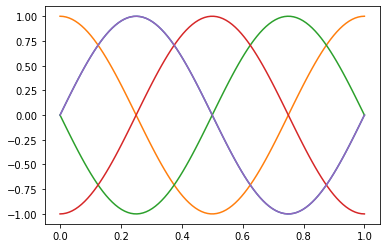

In [47]:
t = np.linspace(0, 1, 100)

y1 = 1.0*np.sin(2*np.pi*1.0*t + np.radians(0))
y2 = 1.0*np.sin(2*np.pi*1.0*t + np.radians(90))
y3 = 1.0*np.sin(2*np.pi*1.0*t + np.radians(180))
y4 = 1.0*np.sin(2*np.pi*1.0*t + np.radians(270))
y5 = 1.0*np.sin(2*np.pi*1.0*t + np.radians(360))

plt.plot(t,y1)
plt.plot(t,y2)
plt.plot(t,y3)
plt.plot(t,y4)
plt.plot(t,y5)

So $\phi$ moves the wave along the x-axis

## Superposition of waves

Since we know that any wave can be decomposed into sine waves of different frequencies and amplitudes, we should also know how to add multiple sine waves to create a single wave. The way of creating a single wave from multiple sine waves is called superposition. Real world measurements like LFP signals are usually composed of more than one frequencies and amplitudes

We will be using simple aritmetic operations to create an artificial signal composed of more than one sine wave

**Example** Create two sine waves and add them to make a combined signal  

y1 with amplitude=1 unit, frequency=1 Hz, phi=0 between 0 and 1 second </br>
y2 with amplitude=2 unit, frequency=1 Hz, phi=0 between 0 and 1 second

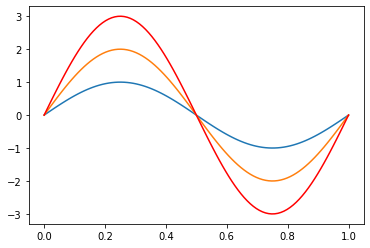

In [50]:
t = np.linspace(0, 1, 100)
y1 = 1.0*np.sin(2.0*np.pi*1.0*t)
y2 = 2.0*np.sin(2.0*np.pi*1.0*t)
y = y1 + y2
plt.plot(t, y1)
plt.plot(t, y2)
plt.plot(t, y, color='r')

**Example** Create two sine waves and add them to make a combined signal  

y1 with amplitude=1 unit, frequency=1 Hz, phi=0 between 0 and 1 second </br>
y2 with amplitude=1 unit, frequency=2 Hz, phi=0 between 0 and 1 second

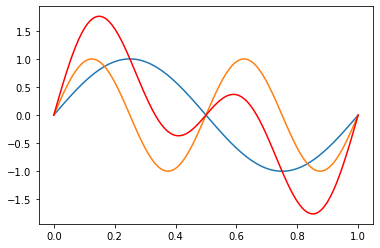

In [51]:
t = np.linspace(0, 1, 100)
y1 = 1.0*np.sin(2.0*np.pi*1.0*t)
y2 = 1.0*np.sin(2.0*np.pi*2.0*t)
y = y1 + y2
plt.plot(t, y1)
plt.plot(t, y2)
plt.plot(t, y, color='r')

Wow! Add signals differing only in frequency can change the shape of the overall signal we measure!

**Example** Create two sine waves and add them to make a combined signal  

y1 with amplitude=1 unit, frequency=1 Hz, phi=0 between 0 and 1 second </br>
y2 with amplitude=1 unit, frequency=1 Hz, phi=180 between 0 and 1 second

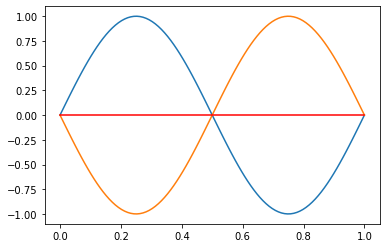

In [53]:
t = np.linspace(0, 1, 100)
y1 = 1.0*np.sin(2.0*np.pi*1.0*t)
y2 = 1.0*np.sin(2.0*np.pi*1.0*t + np.radians(180))
y = y1 + y2
plt.plot(t, y1)
plt.plot(t, y2)
plt.plot(t, y, color='r')

Waves can even cancel each other out!

Let's change everything! Create two sine waves and add them to make a combined signal  

y1 with amplitude=1 unit, frequency=1 Hz, phi=0 between 0 and 1 second </br>
y2 with amplitude=2 unit, frequency=3 Hz, phi=90 between 0 and 1 second

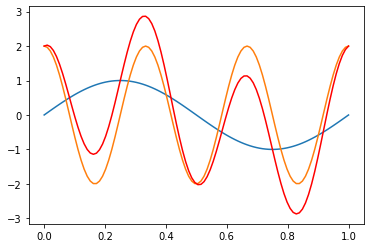

In [56]:
t = np.linspace(0, 1, 100)
y1 = 1.0*np.sin(2.0*np.pi*1.0*t)
y2 = 2.0*np.sin(2.0*np.pi*3.0*t + np.radians(90))
y = y1 + y2
plt.plot(t, y1)
plt.plot(t, y2)
plt.plot(t, y, color='r')

Let's try out one more exercise to get comfortable with this

Create three sine waves and add them to make a combined signal  

y1 with amplitude=1 unit, frequency=1 Hz, phi=0 between 0 and 1 second </br>
y2 with amplitude=2 unit, frequency=3 Hz, phi=90 between 0 and 1 second </br>
y3 with amplitude=0.5 unit, frequency=10 Hz, phi=180 between 0 and 1 second 


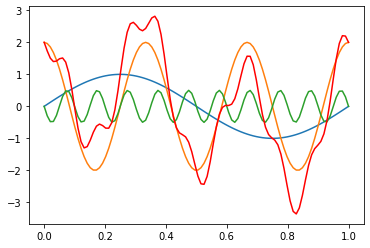

In [58]:
t = np.linspace(0, 1, 100)
y1 = 1.0*np.sin(2.0*np.pi*1.0*t)
y2 = 2.0*np.sin(2.0*np.pi*3.0*t + np.radians(90))
y3 = 0.5*np.sin(2.0*np.pi*10.0*t + np.radians(180))
y = y1 + y2 + y3
plt.plot(t, y1)
plt.plot(t, y2)
plt.plot(t, y3)
plt.plot(t, y, color='r')

Adding more and more signals will result in replicating real world signals. 

## Power spectrum for signal decomposition

In this section, we will first create a composite signal from four signals (alpha, beta, gamma, and delta) each with their own amplitudes and frequencies assuming that $\phi$=0 for all. Then we will use Fast Fourier Transform (FFT) to break down the signal to their individual frequencies.

For this purpose, we will be using `fft` and `fftfreq` methods from `scipy` library

**Libraries**

- **Scipy**: Python library for scientific computing


**Methods**
- **fft(arr)**: computes Fast Fourier Transform of arr. 
- **fftfreq(n_freq, d=)**: generates array of frequencies with n_freq points given sample spacing d. Sample spacing is generally the difference between two consecutive times of measurement. 
- **np.abs()**: Calculates the absolute value.

**Example** Create alpha signal with 10.5 unit amplitude and 110  Hz frequency measured 250 times between 0.01 s and 2.5 s

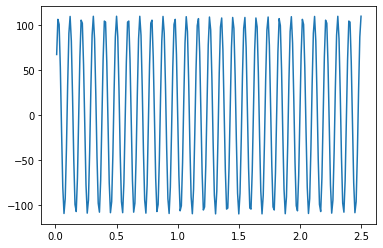

In [68]:
t = np.linspace(0.01, 2.5, 250)
alpha = 110.0*np.sin(2*np.pi*10.5*t)
plt.plot(t, alpha)

Create beta signal with 22.5 unit amplitude and 7.5  Hz frequency measured 250 times between 0.01 s and 2.5 s

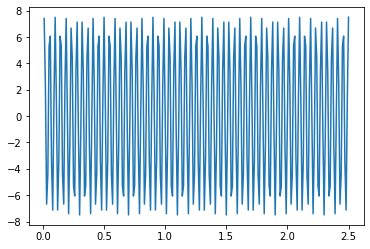

In [69]:
t = np.linspace(0.01, 2.5, 250)
beta = 7.5*np.sin(2*np.pi*22.5*t)
plt.plot(t, beta)

Create gamma signal with 65. unit amplitude and 5.5  Hz frequency measured 250 times between 0.01 s and 2.5 s

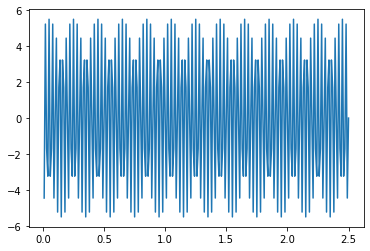

In [70]:
t = np.linspace(0.01, 2.5, 250)
gamma = 5.5*np.sin(2*np.pi*65.0*t)
plt.plot(t, gamma)

Create delta signal with 2.75 unit amplitude and 110  Hz frequency measured 250 times between 0.01 s and 2.5 s

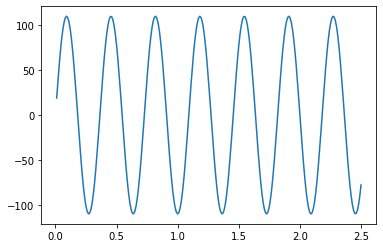

In [71]:
t = np.linspace(0.01, 2.5, 250)
delta = 110.0*np.sin(2*np.pi*2.75*t)
plt.plot(t, delta)

Add all these signals and called the result `signal`

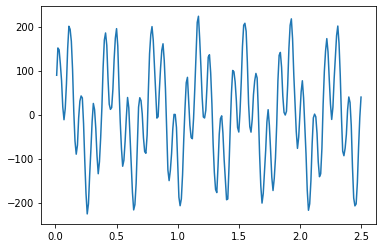

In [72]:
signal = alpha + beta + gamma + delta
plt.plot(t, signal)

Usually the signals are noisy due to many effects. We can assume that each point of our observation has an added noise of amplitude 100 drawn from a normal distribution!

100*np.random.normal(size=len(t))

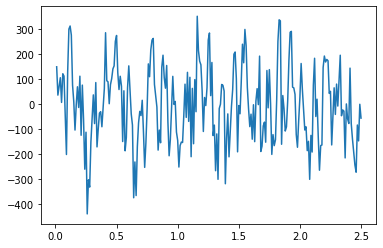

In [73]:
noisy_signal = signal + 100*np.random.normal(size=len(t))
plt.plot(t, noisy_signal)

Frequency analysis or breaking down a composite signal into its elementary components is done by Fast Fourier Transform (FFT). You can do the whole process using the following four lines

**Example** create and plot amplitude spectrum of alpha signal

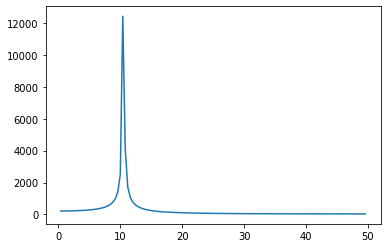

In [75]:
fft_result = fft(alpha)
fft_freqs = fftfreq(len(alpha), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)

We see a peak at around 10 Hz which is close to the frequency of the alpha wave!

create and plot amplitude spectrum of beta signal

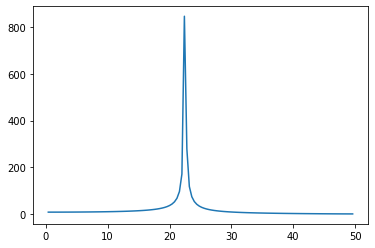

In [77]:
fft_result = fft(beta)
fft_freqs = fftfreq(len(beta), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)

A peak at around 22 Hz which is frequency which is frequency we set for beta wave!

create and plot amplitude spectrum of gamma wave

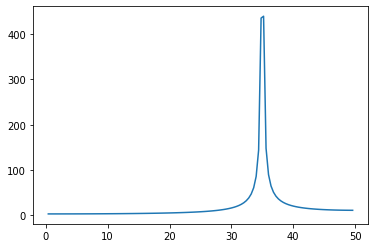

In [79]:
fft_result = fft(gamma)
fft_freqs = fftfreq(len(gamma), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)

This is not right for two reasons. But there are explanations for both of these!

1. The actual frequency is at 65 Hz but the frequency stops at 50 Hz. But this is because we can at most study frequency which is half the sample rate (0.5/t[1] - t[0]) which is 50 Hz for our data (0.5 / 0.01)
2. Sometimes, there can be peaks at frequencies which are multiples of actual frequency like 0.25*f, 0.5*f, 2*f, 3*f etc. These peaks are known as harmonics 

create and plot amplitude spectrum of delta 

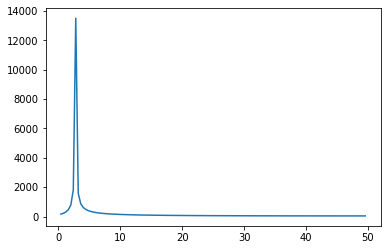

In [87]:
fft_result = fft(delta)
fft_freqs = fftfreq(len(delta), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)

This is correct as the frequency of delta is 2.75 Hz and is well within 50 Hz. Let's combine two of these waves and see how the amplitude spectrum looks like

**Example** Plot amplitude spectrum of a composite signal created from alpha and beta signals

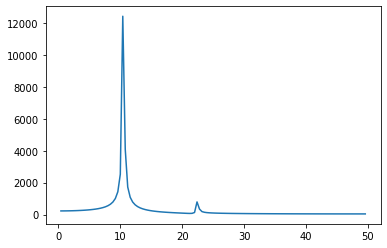

In [88]:
c_signal = alpha + beta
fft_result = fft(c_signal)
fft_freqs = fftfreq(len(c_signal), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)

We see two peaks one at alpha and beta frequencies! However, the amplitude of beta is much smaller. This is because the amplitude of beta signal is much smaller than the alpha

Plot amplitude spectrum of a composite signal created from alpha and beta signalsPlot amplitude spectrum of a composite signal created from alpha and delta signals

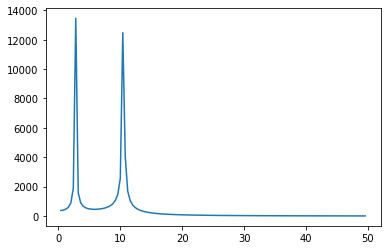

In [89]:
c_signal = alpha + delta
fft_result = fft(c_signal)
fft_freqs = fftfreq(len(c_signal), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)

Now create a spectrum for our `noisy_signal`

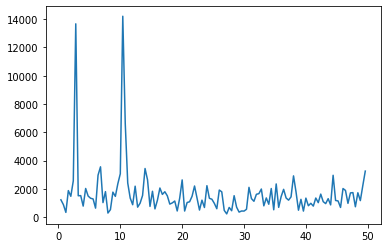

In [90]:
fft_result = fft(noisy_signal)
fft_freqs = fftfreq(len(noisy_signal), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)

There seems to be noise in the signal. You can reduce them by plotting power which is nothing but positive_fft_result**2

Plot the power spectrum

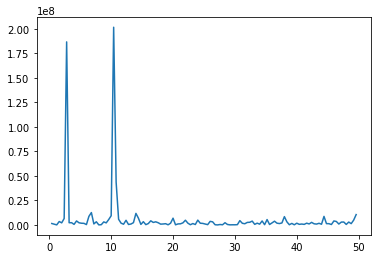

In [91]:
fft_result = fft(noisy_signal)
fft_freqs = fftfreq(len(noisy_signal), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result**2)

We seem to have lost the beta wave at 22.5 Hz due to noise! This shows the effect noise can have on signal and signal decomposition

## Power Spectrum Of Real Data

Let's use our LFP data and see if we can identify any frequencies

**Libraries Used:**

- **Pandas:**
  - `df[df.col_1 == 'val_1']`: Filter and display rows from the DataFrame where 'col_1' equals 'val_1'.
  - `df[(df.col_1 == 'val_1') & (df.col_2 == number)]`: Filter and display rows from the DataFrame where 'col_1' equals 'val_1' and 'col_2' equals a specified number.

**Example** extract only trial column

In [92]:
lfp['trial']

0            1
1            1
2            1
3            1
4            1
          ... 
1434995    410
1434996    410
1434997    410
1434998    410
1434999    410
Name: trial, Length: 1435000, dtype: int32

Extract only 'brain_area_lfp' 

In [93]:
lfp['brain_area_lfp']

0          CA1
1          CA1
2          CA1
3          CA1
4          CA1
          ... 
1434995     PL
1434996     PL
1434997     PL
1434998     PL
1434999     PL
Name: brain_area_lfp, Length: 1435000, dtype: object

**Example** Extract all rows where 'trial' == 5

In [94]:
lfp[lfp['trial'] == 5]

,brain_area_lfp,trial,time,lfp
1000,CA1,5,0.01,-6.295918
1001,CA1,5,0.02,-8.444067
1002,CA1,5,0.03,-10.462585
1003,CA1,5,0.04,9.500378
1004,CA1,5,0.05,-7.721844
...,...,...,...,...
1333745,PL,5,2.46,-4.583488
1333746,PL,5,2.47,3.952876
1333747,PL,5,2.48,-6.983488
1333748,PL,5,2.49,4.307421


Extract all rows where 'trial' == 1

In [95]:
lfp[lfp['trial'] == 1]

,brain_area_lfp,trial,time,lfp
0,CA1,1,0.01,4.211262
1,CA1,1,0.02,13.526077
2,CA1,1,0.03,24.118670
3,CA1,1,0.04,22.285336
4,CA1,1,0.05,-3.825775
...,...,...,...,...
1332745,PL,1,2.46,3.927087
1332746,PL,1,2.47,10.127087
1332747,PL,1,2.48,1.881633
1332748,PL,1,2.49,5.172542


Extract all rows where 'brain_area_lfp' == 'VISp'

In [96]:
lfp[lfp['brain_area_lfp'] == 'VISp']

,brain_area_lfp,trial,time,lfp


Great! Now let's combine the two column conditions together to extract all rows where 'trial' == 1 and 'brain_area_lfp' == 'VISp'

Hint: Use & to combine the two conditions

In [97]:
visp_trial_1 = lfp[(lfp['trial'] == 1) & (lfp['brain_area_lfp'] == 'VISp')]
visp_trial_1

,brain_area_lfp,trial,time,lfp


Using the loaded data, filter the DataFrame (df) to select rows corresponding to a specific brain area and trial. We recommend-

Brain Area: one of VISam, MRN, RN, SCm

Trial Number: 2

In [98]:
brain_area_trial = lfp[(lfp.brain_area_lfp == 'PL') & (lfp.trial == 2)]

**Example** convert 'time' column to numpy array `t`

In [100]:
t = brain_area_trial['time'].to_numpy()

convert 'lfp' column to numpy array `lfps`

In [102]:
lfps = brain_area_trial['lfp'].to_numpy()

Create a power spectrum with time and lfp values

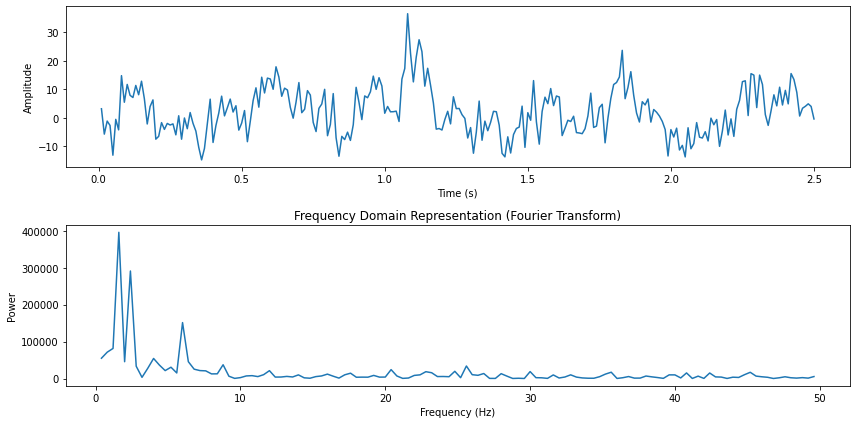

In [103]:
fft_result = fft(lfps)
fft_freqs = fftfreq(len(lfps), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, lfps)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result**2)
plt.title('Frequency Domain Representation (Fourier Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

plt.tight_layout()

What do you understand from this power spectrum? 